<a href="https://colab.research.google.com/github/9-coding/TensorFlow/blob/main/transfer_learning_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


1/1 [==============================] - 1s 770ms/step
예측 결과: [('n02325366', 'wood_rabbit', 0.59149766), ('n02326432', 'hare', 0.38910335), ('n02328150', 'Angora', 0.011381947), ('n02364673', 'guinea_pig', 0.0017736207), ('n03874599', 'padlock', 0.0005876313)]


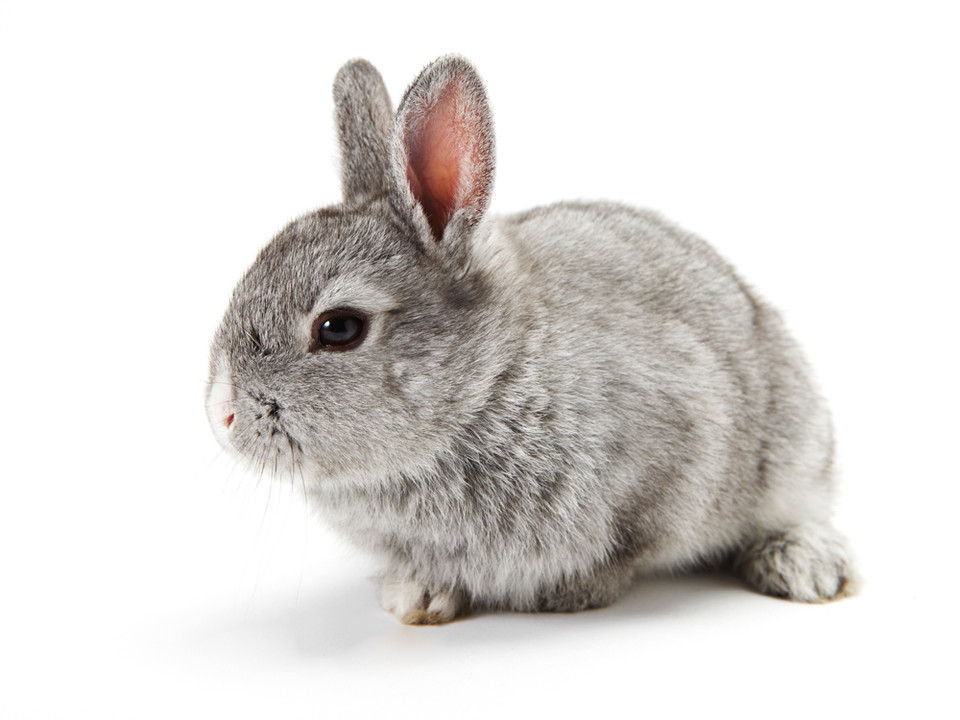

In [7]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

model=ResNet50(weights='imagenet')

img=cv.imread('/content/gdrive/MyDrive/rabbit.jpg')
x=np.reshape(cv.resize(img, (224,224)), (1,224,224,3))
x=preprocess_input(x)

preds=model.predict(x)
top5=decode_predictions(preds, top=5)[0]
print('예측 결과:', top5)

for i in range(5):
  cv.putText(img, top5[i][1]+':'+str(top5[i][2]), (10,20+i*20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255),1)

cv2_imshow(img)

cv.waitKey()
cv.destroyAllWindows()